# Replication code for "Monetary Policy and Speculative Asset Markets"

The code relies only on standard libraries (`numpy`, `scipy` and `matplotlib`), so any fairly conventional Python install should already be set-up.

It is written for some ancient version of python 3, but tested on Python 3.10.

The notebook must be in the same folder as the file `dfi_base.py`, which acts as a library. Also, be sure to execute this notebook from that path.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tqdm import tqdm
from scipy import interpolate

%matplotlib inline

In [2]:
# this will give an error if you are not in the same folder as `dfi_base.py` 
from dfi_base import *

In [3]:
# some additional definitions
inv = np.linalg.inv
plt.rc('text', usetex=True)
warnings.simplefilter("always")

Reproduce Figure 1:

100%|██████████| 500/500 [00:00<00:00, 5314.44it/s]


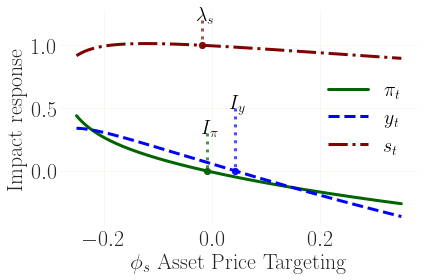

In [4]:
pars = pars_raw.copy()
ptype = 'a_s'
det = 500
x = np.linspace(-0.25, 0.35, det)

X = ()
for i in tqdm(x):
    pars[ptype] = i
    Psi_inv = get_psi_inv(pars)
    States = np.array([[0], [0], [pars['beta']]])
    X += Psi_inv.dot(States),
X = np.array(X)

P_max = max(x[np.where(X[:, 0] > 0)[0]])
Y_max = max(x[np.where(X[:, 1] > 0)[0]])
S_max = max(x[np.where(X[:, 2] > 1)[0]])

# plotting
txs = 22
alp = 0.7
f, ax = plt.subplots(1, 1)
ax.plot([P_max, P_max], [0.3, 0], ':', c='darkgreen', lw=3, alpha=alp)
ax.plot([Y_max, Y_max], [0.5, 0], ':', c='b', lw=3, alpha=alp)
ax.plot([S_max, S_max], [1.2, 1], ':', c='maroon', lw=3, alpha=alp)
ax.plot([P_max, P_max], [0, 0], 'o', c='darkgreen', lw=3, alpha=alp)
ax.plot([Y_max, Y_max], [0, 0], 'o', c='b', lw=3, alpha=alp)
ax.plot([S_max, S_max], [1, 1], 'o', c='maroon', lw=3, alpha=alp)
ax.annotate(r'$I_{\pi}$', xy=(P_max-.01, 0.3), xycoords='data', fontsize=txs-2)
ax.annotate(r'$I_{y}$', xy=(Y_max-.01, 0.5), xycoords='data', fontsize=txs-2)
ax.annotate(r'$\lambda_{s}$', xy=(S_max-.01, 1.2),
            xycoords='data', fontsize=txs-2)
ax.plot(x, X[:, 0], linewidth=3, color='darkgreen', label=r'$\pi_t$')
ax.plot(x, X[:, 1], '--', linewidth=3, color='b', label=r'$y_t$')
ax.plot(x, X[:, 2], '-.', linewidth=3, color='maroon', label=r'$s_t$')
ax.tick_params(axis='both', which='both', top='off',
               right='off', labelsize=txs)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Impact response', size=txs)
ax.set_xlabel(r'${\phi_s}$ Asset Price Targeting', size=txs)
ax.legend(frameon=False, fontsize=txs-2)
ax.set_yticks([0, 1], minor=True)
ax.yaxis.grid(True, which='minor')
ax.set_xticks([0], minor=True)
ax.xaxis.grid(True, which='minor')
plt.tight_layout()

Reproduce Figure 2:

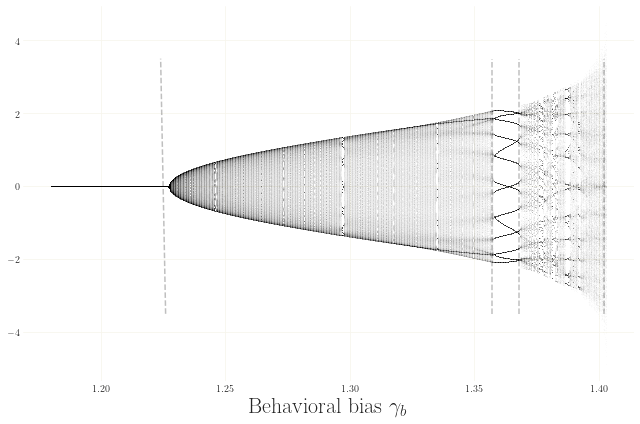

In [5]:
pars = pars_raw.copy()
aufl = 1000

st = 1.18
ending = 1.47
x = np.linspace(st, ending, aufl)
pval = 0
g = 1.006
ioc = 1

P, Y, S, blob = get_ts(pars, ptype='a_s', ioc=ioc, pval=pval,
                       g=g, b=x, no_iters=1000, transition=10000)

alp = 0.7
txs = 22

f, ax = plt.subplots(1, 1, figsize=(9,6))
ax.plot([1.226, 1.224], [-3.5, 3.5], color='gray',
        linewidth=1.5, linestyle="--", alpha=.5)
ax.plot([1.357, 1.357], [-3.5, 3.5], color='gray',
        linewidth=1.5, linestyle="--", alpha=.5)
ax.plot([1.368, 1.368], [-3.5, 3.5], color='gray',
        linewidth=1.5, linestyle="--", alpha=.5)
ax.plot([1.402, 1.402], [-3.5, 3.5], color='gray',
        linewidth=1.5, linestyle="--", alpha=.5)

ax.plot(x, S, '.', color='k', markersize=0.01)
ax.set_xlabel(r'Behavioral bias $\gamma_b$', size=txs)
plt.tight_layout()

The code for the Method of Simulated Moments estimation is provided in a separate script `msm.py`. Note that this script also has to be run from the respective folder that contains `msm.py`, `dfi_base.py` and `data.csv`.

The next snipplet reproduces Figure 3:

100%|██████████| 1000/1000 [00:00<00:00, 5266.37it/s]


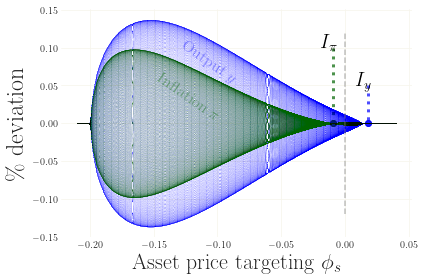

In [6]:
aufl = 1000
st = -.21
ending = .04
x = np.linspace(st, ending, aufl)

# parameters
pars = pars_raw.copy()
pval = x
b = 1.229
g = 1.006
ioc = 1

P, Y, S, blob = get_ts(pars, ptype='a_s', ioc=ioc, pval=pval,
                       g=g, b=b, no_iters=1000, transition=10000)

X2 = []
for i in tqdm(x):
    pars = pars_raw.copy()
    pars['a_s'] = i
    Psi_inv = get_psi_inv(pars)
    States = np.array([[0], [0], [pars['beta']]])
    X = Psi_inv.dot(States)
    X2.append(X)
X2 = np.array(X2)

P2_zero = interpolate.sproot(interpolate.splrep(x, X2[:, 0], s=0))
Y2_zero = 0.018
S2_zero = interpolate.sproot(interpolate.splrep(x, X2[:, 2]-1, s=0))
S2_zero = 0.019

# plotting
alp = 0.7
txs = 22
f, ax = plt.subplots(1, 1)
if np.size(P2_zero) == 1:
    ax.plot([P2_zero, P2_zero], [0.1, 0], ':',
            c='darkgreen', lw=3, alpha=alp)
    ax.plot([P2_zero, P2_zero], [0, 0], 'o',
            c='darkgreen', lw=3, alpha=alp)
    ax.annotate(r'$I_{\pi}$', xy=(P2_zero-.01, 0.1),
                xycoords='data', fontsize=txs-2)
if np.size(Y2_zero) == 1:
    ax.plot([Y2_zero, Y2_zero], [0.05, 0], ':', c='b', lw=3, alpha=alp)
    ax.plot([Y2_zero, Y2_zero], [0, 0], 'o', c='b', lw=3, alpha=alp)
    ax.annotate('$I_{y}$', xy=(Y2_zero-.01, 0.05),
                xycoords='data', fontsize=txs-2)

ax.plot(x, Y, '.', color='b', markersize=0.01)
ax.plot(x, P, '.', color='darkgreen', markersize=0.01)

ax.set_xlabel(r'Asset price targeting $\phi_s$', size=txs)
ax.set_ylabel(r'\% deviation', size=txs+2)

text2 = ax.annotate(r'Inflation $\pi$', xy=(-.15, 0), xytext=(0, 0),
                    textcoords='offset points', alpha=.4,
                    size=16, color='darkgreen',
                    horizontalalignment='left',
                    verticalalignment='bottom')
text2.set_rotation(-35)
text3 = ax.annotate(r'Output $y$', xy=(-.13, 0.05), xytext=(0, 0),
                    textcoords='offset points', alpha=.4,
                    size=16, color='blue',
                    horizontalalignment='left',
                    verticalalignment='bottom')
text3.set_rotation(-35)
ax.plot([0, 0], [-.12, .12], color='gray',
        linewidth=1.5, linestyle="--", alpha=.5)

plt.tight_layout()

Reproduce Figure 4:

100%|██████████| 100/100 [00:04<00:00, 21.05it/s]


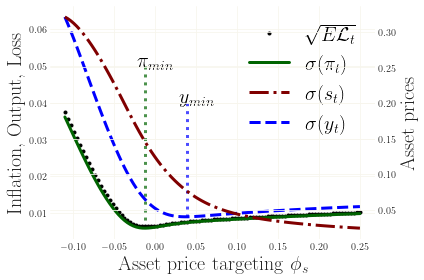

In [7]:
# parameters:
g = .998
b = 1.229

det = 100
batch_no = 100

x = np.linspace(-.11, .25, det)

pars = pars_raw.copy()
pars['std_p'] = .001
pars['std_y'] = .004

kappa = (1-pars['omega'])*(1 - pars['beta']*pars['omega'])/pars['omega']
lambd = (1 + .3)*kappa/10

SP = []
SY = []
SS = []
SL = []
for i in tqdm(range(batch_no)):
    P, Y, S = get_ts(pars, pval=x, g=g, b=b, no_iters=159,
                     transition=100, rnd_seed=i)[:3]
    SP.append(np.std(P, axis=1))
    SY.append(np.std(Y, axis=1))
    SS.append(np.std(S, axis=1))
    SL.append(np.sqrt(np.mean(P**2 + lambd*Y**2, axis=1)))

SP = np.mean(SP, axis=0)
SY = np.mean(SY, axis=0)
SS = np.mean(SS, axis=0)
SL = np.mean(SL, axis=0)

SP_min = x[np.argmin(SP)]
SY_min = x[np.argmin(SY)]

# plotting
alp = 0.7
txs = 22
f, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
ax.plot([SP_min, SP_min], [min(SP), .05], ':', c='darkgreen', lw=3, alpha=alp)
ax.plot([SY_min, SY_min], [min(SY), .04], ':', c='b', lw=3, alpha=alp)
ax.plot(x, SL, '.', color='k', linewidth=2, label='$\\sqrt{E \\mathcal{L}_t}$') 
ax.plot(x, SP, color='darkgreen', linewidth=3, label='$\\sigma(\\pi_t)$')
ax.plot(x, SY, '--', color='b', linewidth=3, label='$\\sigma(y_t)$')
ax2.plot(x, SS, '-.', color='maroon', linewidth=3, label='$\\sigma(s_t)$')
ax.annotate('$\\pi_{min}$', xy=(SP_min-.01, .05),
            xycoords='data', fontsize=txs-2)
ax.annotate('$y_{min}$', xy=(SY_min-.01, .04), xycoords='data', fontsize=txs-2)
ax2.set_ylabel('Asset prices', fontsize=txs-2)
ax.set_ylabel('Inflation, Output, Loss', fontsize=txs-2)
ax.set_xlabel('Asset price targeting $\\phi_s$', fontsize=txs-2)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1[:2] + h2 + [h1[-1]], l1[:2] + l2 + [l1[-1]], frameon=False, fontsize=txs-2)
plt.tight_layout()

The following code reproduces Figures 5, 6, 7 and 9:

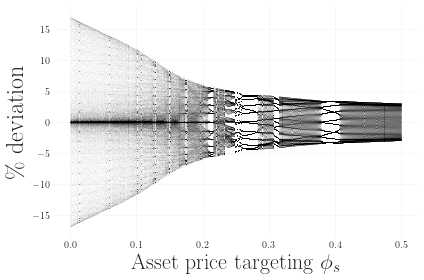

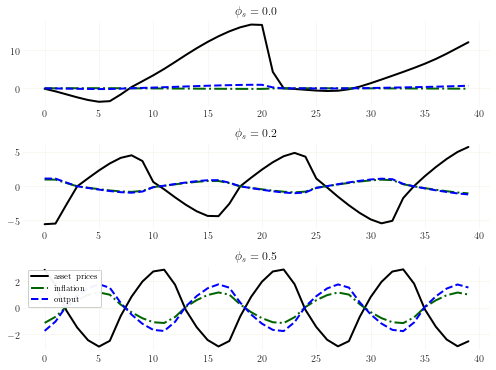

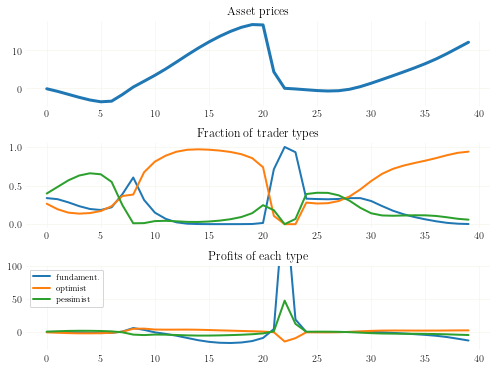

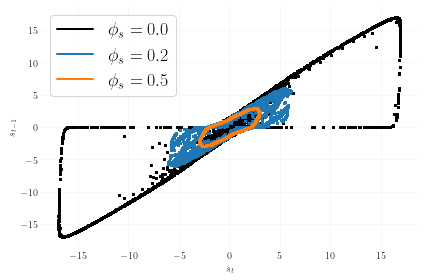

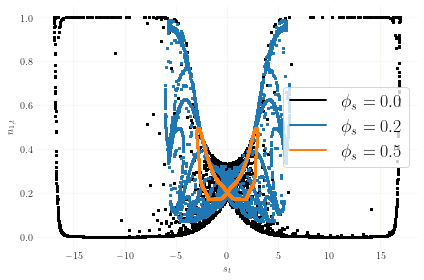

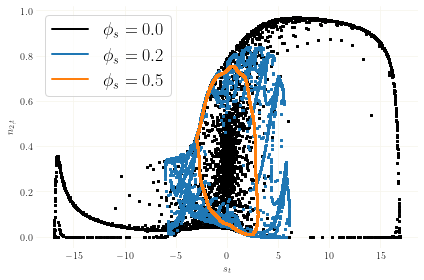

In [8]:
aufl = 1000
st = 0
ending = .5
x = np.linspace(st, ending, aufl)

# parameters
pars = pars_raw.copy()
pval = x
b = 2.5
g = 0.93
ioc = .4

P, Y, S, blob = get_ts(pars, ptype='a_s', ioc=ioc, pval=pval, g=g, b=b, no_iters=1000, transition=10000)
S2_zero = 0.019

# plotting
alp = 0.7
txs = 22

f, ax = plt.subplots(1, 1)
ax.plot(x, S, '.', color='k', markersize=0.01)
ax.set_xlabel(r'Asset price targeting $\phi_s$', size=txs)
ax.set_ylabel(r'\% deviation', size=txs+2)
plt.tight_layout()

xx = 0, 400, 999
f, ax = plt.subplots(3, 1, figsize=(7,7*.75))
ax[2].plot(S[xx[2], 10:50], color='k', lw=2, label='asset prices')
ax[2].plot(P[xx[2], 10:50], '-.', color='darkgreen', lw=2, label='inflation')
ax[2].plot(Y[xx[2], 10:50], '--', color='b', lw=2, label='output')
ax[1].plot(S[xx[1], 10:50], color='k', lw=2)
ax[1].plot(P[xx[1], 10:50], '-.', color='darkgreen', lw=2)
ax[1].plot(Y[xx[1], 10:50], '--', color='b', lw=2)
ax[0].plot(S[xx[0], 110:150], color='k', lw=2)
ax[0].plot(P[xx[0], 110:150], '-.', color='darkgreen', lw=2)
ax[0].plot(Y[xx[0], 110:150], '--', color='b', lw=2)
ax[0].set_title(r'$\phi_s = %s$' % pval[xx[0]].round(3))
ax[1].set_title(r'$\phi_s = %s$' % pval[xx[1]].round(3))
ax[2].set_title(r'$\phi_s = %s$' % pval[xx[2]].round(3))
ax[2].legend(loc='upper left', framealpha=.95)
plt.tight_layout()

n1, n2, u0, u1, u2 = blob
f, ax = plt.subplots(3, 1, figsize=(7,7*.75))
ax[0].plot(S[xx[0], 110:150], lw=3)
ax[1].plot((1-n1-n2)[0, 109:149], lw=2, label='fundament.')
ax[1].plot(n1[0, 109:149], lw=2, label='optimist')
ax[1].plot(n2[0, 109:149], lw=2, label='pessimist')
ax[2].plot((u0)[0, 109:149], lw=2, label='fundament.')
ax[2].plot((u1)[0, 109:149], lw=2, label='optimist')
ax[2].plot((u2)[0, 109:149], lw=2, label='pessimist')
ax[2].set_ylim(None, 100)
ax[0].set_title('Asset prices')
ax[1].set_title('Fraction of trader types')
ax[2].set_title('Profits of each type')
ax[2].legend(loc='upper left', framealpha=.8)
plt.tight_layout()

P, Y, S, blob = get_ts(pars, ptype='a_s', ioc=ioc, pval=pval, g=g, b=b, no_iters=10000, transition=10000)
n1, n2, u0, u1, u2 = blob

lines = [Line2D([0], [0], color='k', lw=2),
         Line2D([0], [0], color='C0', lw=2),
         Line2D([0], [0], color='C1', lw=2)]

labels = [r'$\phi_s=%s$' % x[xx[0]].round(3),
          r'$\phi_s=%s$' % x[xx[1]].round(3),
          r'$\phi_s=%s$' % x[xx[2]].round(3)]

fig, ax = plt.subplots(1, 1)
ax.scatter(S[xx[0], :-1], S[xx[0], 1:], marker=',', s=2, c='k')
ax.scatter(S[xx[1], :-1], S[xx[1], 1:], marker=',', s=2)
ax.scatter(S[xx[2], :-1], S[xx[2], 1:], marker=',', s=2)
ax.legend(lines, labels, framealpha=.8, fontsize=18)
ax.set_xlabel('$s_t$')
ax.set_ylabel('$s_{t-1}$')
fig.tight_layout()

fig, ax = plt.subplots(1, 1)
ax.scatter(S[xx[0], :-1], (1-n2-n1)[xx[0], 1:], marker=',', s=2, c='k')
ax.scatter(S[xx[1], :-1], (1-n2-n1)[xx[1], 1:], marker=',', s=2)
ax.scatter(S[xx[2], :-1], (1-n2-n1)[xx[2], 1:], marker=',', s=2)
ax.legend(lines, labels, framealpha=.8, fontsize=18)
ax.set_xlabel('$s_t$')
ax.set_ylabel('$n_{1,t}$')
fig.tight_layout()

fig, ax = plt.subplots(1, 1)
ax.scatter(S[xx[0], :-1], n1[xx[0], 1:], marker=',', s=2, c='k')
ax.scatter(S[xx[1], :-1], n1[xx[1], 1:], marker=',', s=2)
ax.scatter(S[xx[2], :-1], n1[xx[2], 1:], marker=',', s=2)
ax.legend(lines, labels, framealpha=.8, fontsize=18)
ax.set_xlabel('$s_t$')
ax.set_ylabel('$n_{2,t}$')
fig.tight_layout()

Finally, reproduce Figure 8:

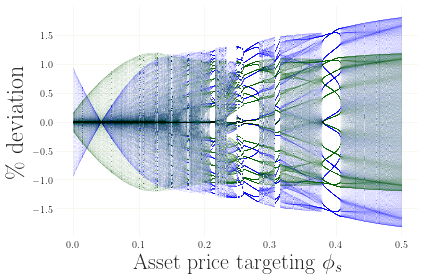

In [9]:
aufl = 1000
st = 0
ending = .5
x = np.linspace(st, ending, aufl)
pval = x

# parameters
pars = pars_raw.copy()
b = 2.5
g = 0.93
ioc = .4

P, Y, S, blob = get_ts(pars, ptype='a_s', ioc=ioc, pval=pval,
                       g=g, b=b, no_iters=1000, transition=10000)

# plotting
alp = 0.7
txs = 22
f, ax = plt.subplots(1, 1)
ax.plot(x, Y, '.', color='b', markersize=0.01)
ax.plot(x, P, '.', color='darkgreen', markersize=0.01)
ax.set_xlabel(r'Asset price targeting $\phi_s$', size=txs)
ax.set_ylabel(r'\% deviation', size=txs+2)
plt.tight_layout()